In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [71]:
data=pd.read_csv("multiple_linear_regression_dataset.csv")

In [72]:
data.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [73]:
data.shape

(198, 3)

In [74]:
cor=data.corr()

<Axes: >

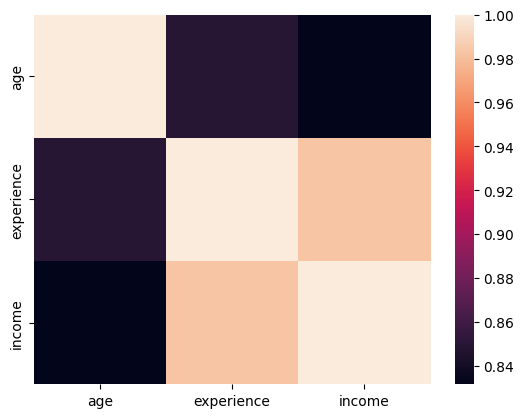

In [75]:
sns.heatmap(cor)

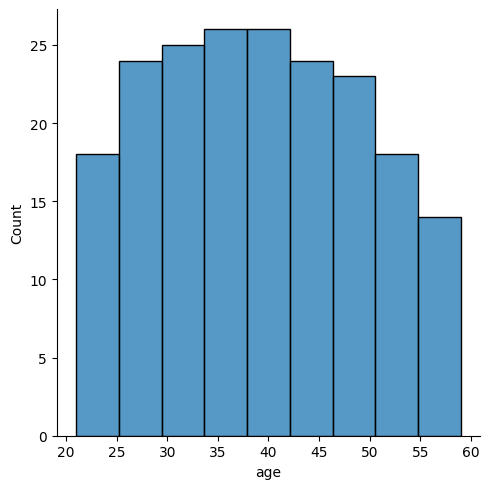

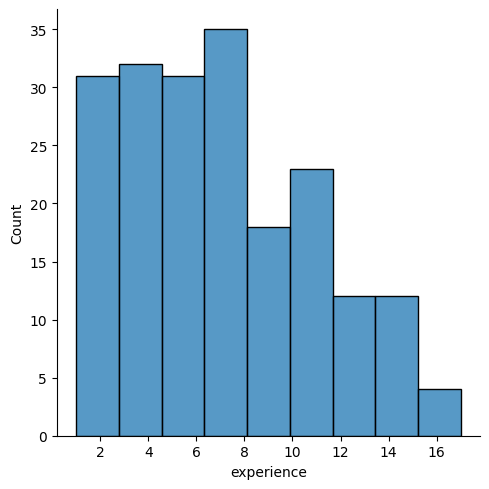

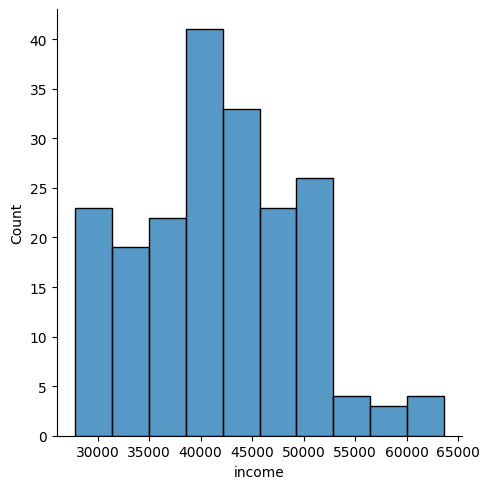

In [76]:
lis=['age','experience','income']
for i in lis:
    sns.displot(x=i,data=data)

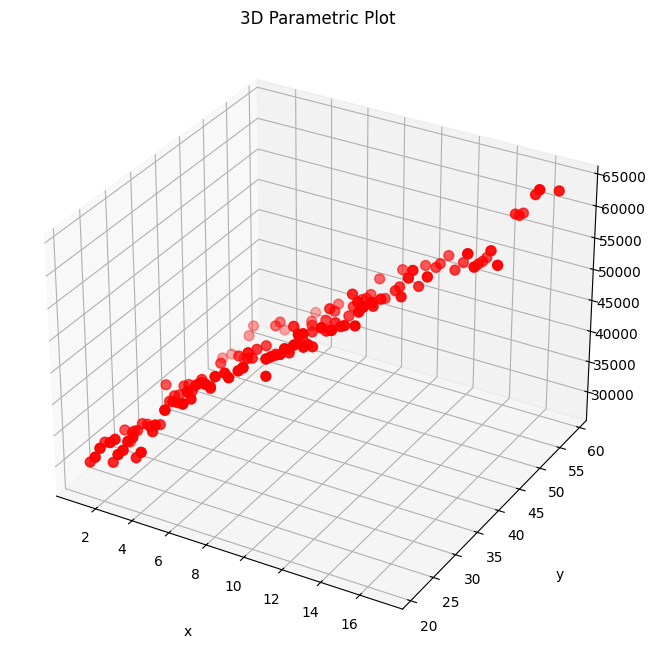

In [77]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
z = data['income']
x = data['experience']
y = data['age']

ax.scatter(x, y, z, c = 'r', s = 50)
ax.set_title('3D Parametric Plot')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()

In [78]:
x=data.drop(['income'],axis=1)
y=data['income']

In [79]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [81]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
y_pred=lr.predict(x_test)

In [83]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(f"r2_score={r2}")

r2_score=0.9721573353010401


In [84]:
class myMlr():
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x_train, y_train):
        # adding one in the beginning of a row
        x_train = np.insert(x_train, 0, 1, axis=1)
        
        betas = np.linalg.inv(np.dot(x_train.T, x_train)).dot(x_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, x_test):
        y_pred = np.dot(x_test, self.coef_) + self.intercept_
        return y_pred


In [85]:
mlr=myMlr()
mlr.fit(x_train,y_train)

In [86]:
from sklearn.metrics import r2_score,mean_absolute_error
print(f"r2={r2_score(y_test,mlr.predict(x_test))}")
print(f"mean_absolute_error={mean_absolute_error(y_test,mlr.predict(x_test))}")

r2=0.9721573353010398
mean_absolute_error=1135.01910165148


In [87]:
y

0      30450
1      35670
2      31580
3      40130
4      47830
       ...  
193    52500
194    45700
195    40870
196    45500
197    31400
Name: income, Length: 198, dtype: int64

In [88]:
full_y=lr.predict(x)

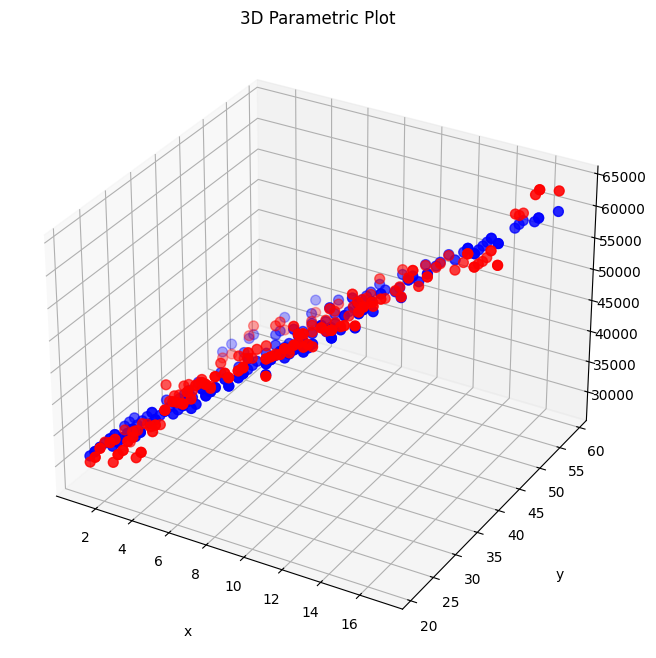

In [92]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
z = data['income']
x = data['experience']
y = data['age']

ax.scatter(x, y, z, c = 'r', s = 50)
ax.set_title('3D Parametric Plot')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)

z =full_y
x = data['experience']
y = data['age']

ax.scatter(x, y, z, c = 'b', s = 50)
ax.set_title('3D Parametric Plot')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()